# **Escuela Politecnica Nacional**

# **Taller 02**

## **Nombres:** Sebastián Morales, Moisés Pineda

In [3]:
import numpy as np
import scipy.optimize as opt

# Definir el polinomio y su derivada
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def df(x):
    return 4*x**3 + 3*540*x**2 + 2*109124*x + 9781632

# Aproximaciones iniciales para la búsqueda de raíces
x0_values = [-800, -600, -400, -200, 0, 200, 400]

# Encontrar raíces con el método de Newton y evitar duplicados
roots = set()  # Usamos un conjunto para evitar duplicados
for x0 in x0_values:
    try:
        root = opt.newton(f, x0, fprime=df)
        root = round(root, 6)  # Redondear para evitar problemas de precisión
        roots.add(root)  # Agregar al conjunto
    except RuntimeError:
        print(f"No se encontró raíz con el valor inicial {x0}")

# Convertir el conjunto a una lista y ordenar las raíces
roots = sorted(list(roots))

print(f"Raíces encontradas: {roots}")


Raíces encontradas: [-152.0, -126.000017, -126.000003, -125.999977]


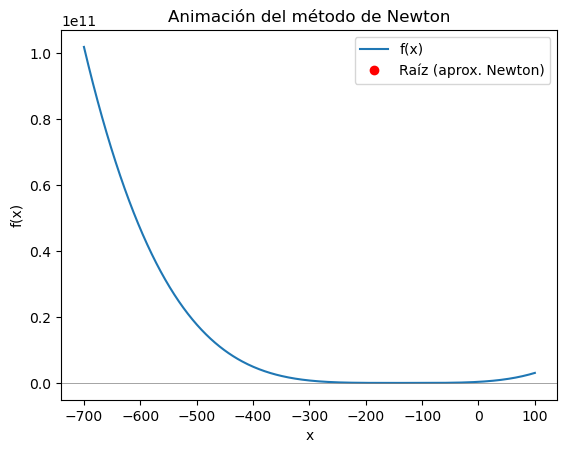

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Rango de x para graficar el polinomio
x_vals = np.linspace(-700, 100, 400)
y_vals = f(x_vals)

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label='f(x)')
ax.axhline(0, color='gray', lw=0.5)
points, = ax.plot([], [], 'ro', label='Raíz (aprox. Newton)')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Animación del método de Newton')

# Guardar las aproximaciones de Newton para cada raíz
newton_steps = []
for x0 in x0_values:
    steps = [x0]
    x = x0
    for _ in range(6):
        x = x - f(x)/df(x)
        steps.append(x)
    newton_steps.append(steps)

# Aplanar los pasos y asociar cada uno con su color
all_steps = []
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, steps in enumerate(newton_steps):
    for x in steps:
        all_steps.append((x, colors[i]))

def animate(i):
    ax.clear()
    ax.plot(x_vals, y_vals, label='f(x)')
    ax.axhline(0, color='gray', lw=0.5)
    for j in range(min(i+1, len(all_steps))):
        x, color = all_steps[j]
        ax.plot(x, f(x), 'o', color=color)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Animación del método de Newton')
    ax.legend()

ani = animation.FuncAnimation(fig, animate, frames=len(all_steps), interval=500, repeat=False)
plt.show()

In [4]:
import numpy as np
# Usar la función f(x) ya definida en la celda 1
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

# Implementación optimizada del método de bisección
def biseccion(f, a, b, TOL, N0):
    """
    Método de bisección con condición mejorada para reducir iteraciones.

    Parámetros:
    ecuacion - Función a evaluar.
    a, b - Extremos iniciales del intervalo.
    TOL  - Tolerancia para la precisión.
    N0   - Número máximo de iteraciones.
    """
    FA = f(a)
    p = a  # Inicializamos p fuera del bucle para compararlo después

    for i in range(1, N0 + 1):
        p_anterior = p  # Guardamos el punto anterior
        p = (a + b) / 2
        FP = f(p)

        if FP == 0 or abs(p - p_anterior) < TOL:  # Detener si el cambio es menor que la tolerancia
            print(f"Raíz encontrada: p = {p:.2f}, iteración {i}")
            return p

        if FA * FP > 0:
            a = p
            FA = FP
        else:
            b = p

    print(f"El método falló después de {N0} iteraciones.")
    return None

# Definimos los intervalos en los que se buscarán soluciones
intervalos = [(-200, -100), (-100, 0),(0, 100,), (100, 200)]
TOL = 10**-2
N0 = 50

# Ejecutamos el método de bisección en cada intervalo
for a, b in intervalos:
    raiz = biseccion(f, a, b, TOL, N0)
    if raiz is not None:
        print(f"Raíz en el intervalo ({a}, {b}): {raiz:.2f}")


Raíz encontrada: p = -152.00, iteración 14
Raíz en el intervalo (-200, -100): -152.00
Raíz encontrada: p = -0.01, iteración 14
Raíz en el intervalo (-100, 0): -0.01
Raíz encontrada: p = 99.99, iteración 14
Raíz en el intervalo (0, 100): 99.99
Raíz encontrada: p = 199.99, iteración 14
Raíz en el intervalo (100, 200): 199.99


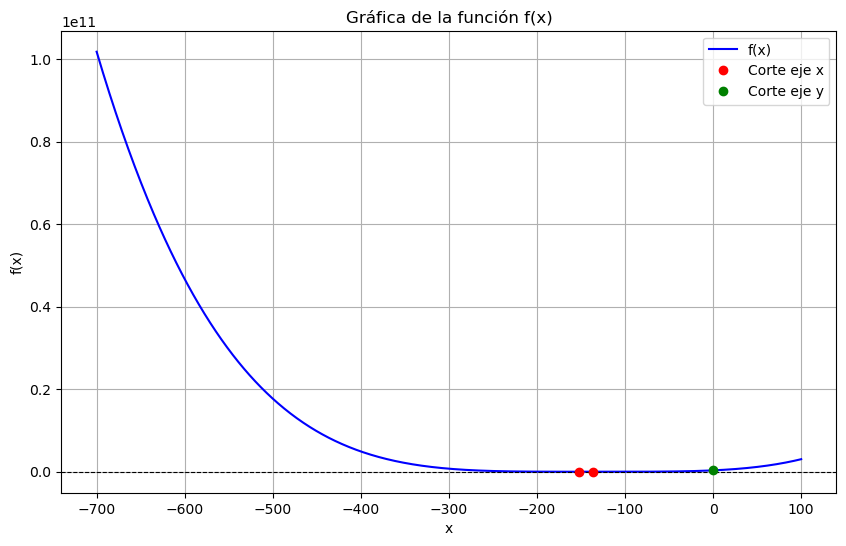

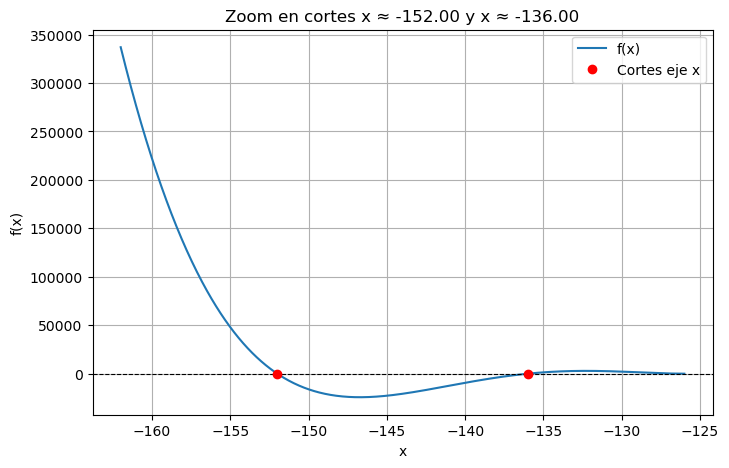

In [28]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Definir la función f(x)
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

# Crear un rango de valores para x
x_vals = np.linspace(-700, 100, 1000)  # Más puntos para una gráfica suave
y_vals = f(x_vals)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea horizontal en y=0
plt.title('Gráfica de la función f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
# Mostrar todos los cortes de la función en el eje x (raíces) y en el eje y (intersección con y)
# Cortes con el eje x (donde f(x) = 0)

# Buscar intervalos donde la función cambia de signo
x_cortes = []
for i in range(len(x_vals)-1):
    if y_vals[i]*y_vals[i+1] < 0:
        try:
            x_corte = brentq(f, x_vals[i], x_vals[i+1])
            x_cortes.append(x_corte)
        except ValueError:
            pass

# Cortes con el eje y (donde x = 0)
y_corte = f(0)

# Graficar los cortes
for x_corte in x_cortes:
    plt.plot(x_corte, 0, 'ro', label='Corte eje x' if x_corte == x_cortes[0] else "")
plt.plot(0, y_corte, 'go', label='Corte eje y')

plt.legend()
# Función para hacer zoom en torno a los puntos rojos (cortes con el eje x)
def zoom_en_cortes(x_cortes, margen=10):
    for x_corte in x_cortes:
        plt.figure(figsize=(6, 4))
        # Definir el rango de zoom alrededor del corte
        x_zoom = np.linspace(x_corte - margen, x_corte + margen, 500)
        y_zoom = f(x_zoom)
        plt.plot(x_zoom, y_zoom, label='f(x)')
        plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
        plt.plot(x_corte, 0, 'ro', label='Corte eje x')
        plt.title(f'Zoom en corte x ≈ {x_corte:.2f}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)
        plt.legend()
        plt.show()

plt.show()
# Hacer zoom en torno a los dos puntos de corte en la misma gráfica
if len(x_cortes) >= 2:
    margen = 10
    x_min = min(x_cortes) - margen
    x_max = max(x_cortes) + margen
    x_zoom = np.linspace(x_min, x_max, 1000)
    y_zoom = f(x_zoom)
    plt.figure(figsize=(8, 5))
    plt.plot(x_zoom, y_zoom, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.plot(x_cortes, [0]*len(x_cortes), 'ro', label='Cortes eje x')
    plt.title(f'Zoom en cortes x ≈ {x_cortes[0]:.2f} y x ≈ {x_cortes[1]:.2f}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

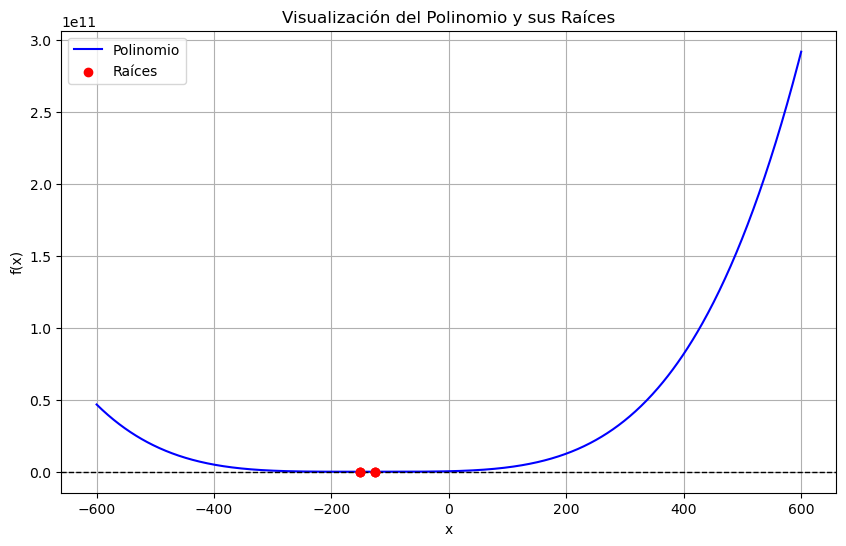

Raíces aproximadas encontradas: [-151.9999999999925, -151.99999999997786, -152.00000000004113, -126.00002916124325, -125.99997933572538, -125.99998288920986]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definir el polinomio y su derivada
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def df(x):
    return 4*x**3 + 3*540*x**2 + 2*109124*x + 9781632

# Rango de valores para la gráfica
x_vals = np.linspace(-600, 600, 1000)
y_vals = f(x_vals)

# Aproximaciones iniciales para encontrar raíces
x0_values = [-550, -350, -150, 50, 250, 450]

# Encontrar raíces con el método de Newton
roots = [opt.newton(f, x0, fprime=df) for x0 in x0_values]

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Polinomio", color="blue")
plt.axhline(0, color="black", linewidth=1, linestyle="--")

# Graficar raíces
plt.scatter(roots, [0]*len(roots), color="red", zorder=3, label="Raíces")

# Etiquetas
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Visualización del Polinomio y sus Raíces")
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

print(f"Raíces aproximadas encontradas: {roots}")


In [1]:
from scipy.optimize import newton

# Define la función polinómica
def f(x):
    return x**4 + 540*x**3 + 108124*x**2 - 9751632*x + 328188672

# Define la derivada del polinomio
def f_prime(x):
    return 4*x**3 + 3*540*x**2 + 2*108124*x - 9751632

# Estimaciones iniciales para las raíces (estos son solo ejemplos, es posible que necesites mejores)
initial_guesses = [-10, 10, -200, 200]
roots = []

for guess in initial_guesses:
    try:
        root = newton(f, guess, fprime=f_prime, maxiter=100, tol=1e-6)
        roots.append(root)
    except RuntimeError:
        print(f"El método de Newton no pudo converger para la estimación inicial: {guess}")

print("Raíces aproximadas:", roots)

El método de Newton no pudo converger para la estimación inicial: -10
El método de Newton no pudo converger para la estimación inicial: 10
El método de Newton no pudo converger para la estimación inicial: -200
El método de Newton no pudo converger para la estimación inicial: 200
Raíces aproximadas: []
